# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_found=[]
cloudiness=[]
countries = []
date =[]
humidity=[]
lat=[]
lon=[]
max_temp=[]
wind_speed=[]
print("Beginning Data Retrieval")
print("---------------------------")
for city in cities:
    
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    response = requests.get(url)
#    print(response.url)
    response=response.json()


    try:
        #print(f"Processing Record: City Name: {city}; City Number:{response["sys"]["id"]}")
        city_id=response["id"]
        print(f"Processing Record. City Name: {city}, City ID: {city_id}")
        cities_found.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
    except:
        print("Something wrong. Skipping...")
        pass
print("---------------------------")
print("Data Retrieval Complete")
df=pd.DataFrame({
    "City":cities_found,
    "Cloudiness": cloudiness,
    "Country":countries,
    "Date":date,
    "Humidity": humidity,
    "Lat":lat,
    "Lon":lon,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

Beginning Data Retrieval
---------------------------
Something wrong. Skipping...
Processing Record. City Name: hualmay, City ID: 3939761
Processing Record. City Name: butaritari, City ID: 2110227
Processing Record. City Name: port elizabeth, City ID: 964420
Something wrong. Skipping...
Processing Record. City Name: kaitangata, City ID: 2208248
Processing Record. City Name: saint-philippe, City ID: 935215
Processing Record. City Name: te anau, City ID: 2181625
Processing Record. City Name: hofn, City ID: 2630299
Processing Record. City Name: buraydah, City ID: 107304
Processing Record. City Name: mataura, City ID: 6201424
Processing Record. City Name: port alfred, City ID: 964432
Processing Record. City Name: bosaso, City ID: 64013
Processing Record. City Name: el alto, City ID: 3697441
Processing Record. City Name: fairbanks, City ID: 5861897
Processing Record. City Name: rikitea, City ID: 4030556
Processing Record. City Name: capitao poco, City ID: 3403127
Processing Record. City Nam

Processing Record. City Name: kodiak, City ID: 5866583
Processing Record. City Name: grand gaube, City ID: 934479
Processing Record. City Name: tiksi, City ID: 2015306
Processing Record. City Name: new norfolk, City ID: 2155415
Processing Record. City Name: praya, City ID: 3374333
Processing Record. City Name: norman wells, City ID: 6089245
Processing Record. City Name: popondetta, City ID: 2088163
Processing Record. City Name: hays, City ID: 4696788
Processing Record. City Name: vaini, City ID: 4032243
Something wrong. Skipping...
Processing Record. City Name: hami, City ID: 1529484
Processing Record. City Name: cabo san lucas, City ID: 3985710
Processing Record. City Name: wilmington, City ID: 4499379
Processing Record. City Name: coihaique, City ID: 3894426
Something wrong. Skipping...
Processing Record. City Name: susehri, City ID: 739209
Processing Record. City Name: pacific grove, City ID: 5380437
Something wrong. Skipping...
Processing Record. City Name: balabac, City ID: 172867

Processing Record. City Name: kilindoni, City ID: 157429
Processing Record. City Name: darhan, City ID: 2031964
Processing Record. City Name: bambanglipuro, City ID: 1650434
Processing Record. City Name: chivay, City ID: 3943626
Processing Record. City Name: college, City ID: 5859699
Processing Record. City Name: nhulunbuy, City ID: 2064735
Processing Record. City Name: chicama, City ID: 3698359
Processing Record. City Name: portland, City ID: 5746545
Processing Record. City Name: opoczno, City ID: 763111
Processing Record. City Name: ostersund, City ID: 2685750
Something wrong. Skipping...
Processing Record. City Name: lokoja, City ID: 2331939
Processing Record. City Name: longyearbyen, City ID: 2729907
Processing Record. City Name: alofi, City ID: 4036284
Processing Record. City Name: saint-joseph, City ID: 6690296
Processing Record. City Name: torbay, City ID: 6167817
Processing Record. City Name: killybegs, City ID: 2963295
Processing Record. City Name: chiang khong, City ID: 16111

Processing Record. City Name: padang, City ID: 1633419
Processing Record. City Name: quatre cocos, City ID: 1106643
Processing Record. City Name: bandarbeyla, City ID: 64814
Processing Record. City Name: listvyanka, City ID: 2020744
Processing Record. City Name: roebourne, City ID: 2062276
Processing Record. City Name: san felipe, City ID: 3628423
Processing Record. City Name: hirata, City ID: 1862471
Processing Record. City Name: huarmey, City ID: 3939168
Processing Record. City Name: santo domingo, City ID: 3492908
Something wrong. Skipping...
Something wrong. Skipping...
Processing Record. City Name: mahibadhoo, City ID: 1337605
Processing Record. City Name: tynda, City ID: 2014718
Processing Record. City Name: san vicente, City ID: 3428068
Processing Record. City Name: olinda, City ID: 3393536
Something wrong. Skipping...
Processing Record. City Name: tevaitoa, City ID: 4033375
Processing Record. City Name: zyryanka, City ID: 2119283
Processing Record. City Name: creston, City ID: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df.to_csv(r"../output_data/weather_queries.csv", index=False)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

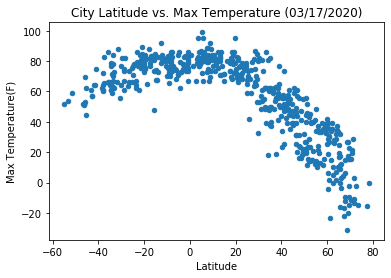

In [5]:
fig, ax = plt.subplots()
df.plot.scatter(x="Lat",y="Max Temp", ax=ax)
ax.set_title("City Latitude vs. Max Temperature (03/17/2020)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature(F)")
fig.savefig("../output_data/temp_vs_lat.png")

Based on the plot above, the earth's temperature peaks around equator(between latitude -20 and 0) and decreases roughly linearly as the absolute value of lantitude increases in both directions, north and south. The rate of declining is slower in southern hemisphere. This makes sense because of the obliquity of the earth and the angle of the sunlight hitting earth is more normal on the southern hemisphere. The temperature is higher when the sunlight hit the surface at a more normal angle. In another word, it is because the southern hemisphere is right now in summer.

#### Latitude vs. Humidity Plot

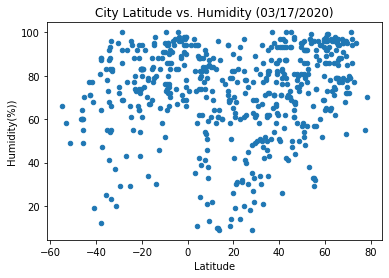

In [6]:
fig, ax = plt.subplots()
df.plot.scatter(x="Lat",y="Humidity", ax=ax)
ax.set_title("City Latitude vs. Humidity (03/17/2020)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity(%))")
fig.savefig("../output_data/humidity_vs_lat.png")

There is a wide distribution of humidity among all the cities but the humidity seems to be lower around latitude about 20. That is where the Sahara Desert is located. 

#### Latitude vs. Cloudiness Plot

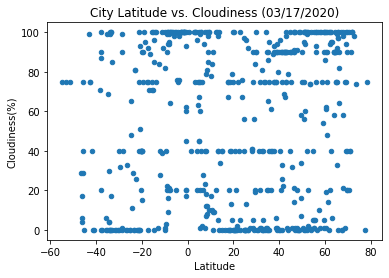

In [7]:
fig, ax = plt.subplots()
df.plot.scatter(x="Lat",y="Cloudiness", ax=ax)
ax.set_title("City Latitude vs. Cloudiness (03/17/2020)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness(%)")
fig.savefig("../output_data/cloudiness_vs_lat.png")

The cloudiness data seem to congregate to a few values, eg, 0%, 20%, 40%... This maybe due to how the cloudiness is estimated. 

#### Latitude vs. Wind Speed Plot

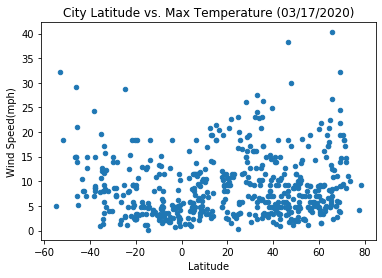

In [8]:
fig, ax = plt.subplots()
df.plot.scatter(x="Lat",y="Wind Speed", ax=ax)
ax.set_title("City Latitude vs. Max Temperature (03/17/2020)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed(mph)")
fig.savefig("../output_data/WindSpeed_vs_lat.png")

Wind speed seems to be the lowest around latitude of -20 and increases as the latitude increases or decreases.

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression_plot (x_values, y_values,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(x_values.mean(),y_values.mean()),fontsize=15,color="red")

    # Print r square value
    print(f"The r-squared is: {rvalue}")

    # Show plot
    plt.show()
    return 


In [10]:
# Create Northern and Southern Hemisphere DataFrames
condition =df["Lat"]>0
condition_1=df["Lat"]<0
df_northern_hemisphere= df[condition]
df_southern_hemisphere= df[condition_1]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.22x +95.94
The r-squared is: -0.888609267608971


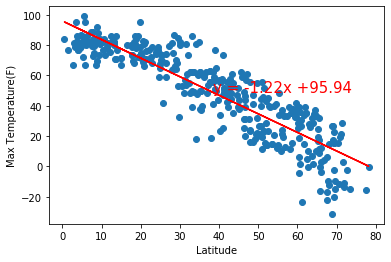

In [11]:
regression_plot(df_northern_hemisphere["Lat"],df_northern_hemisphere["Max Temp"],"Latitude","Max Temperature(F)")

rsquare is high, indicating that the linear regression model is a good fit to the data.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.41x +81.82
The r-squared is: 0.5908945267436876


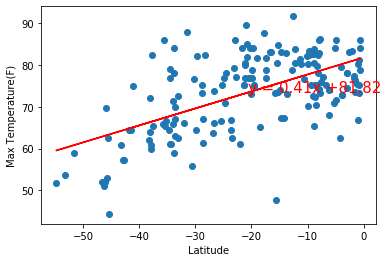

In [12]:
regression_plot(df_southern_hemisphere["Lat"],df_southern_hemisphere["Max Temp"],"Latitude","Max Temperature(F)")

rsquare is high, indicating that the linear regression model is a good fit to the data.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.34x +57.99
The r-squared is: 0.32449012099857666


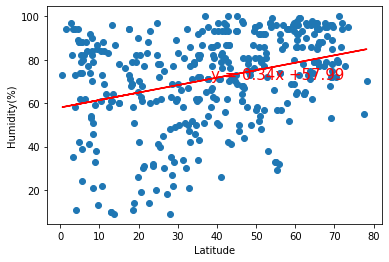

In [13]:
regression_plot(df_northern_hemisphere["Lat"],df_northern_hemisphere["Humidity"],"Latitude","Humidity(%)")

rsquare is low, indicating that the linear regression model may not be a good fit to the data.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.56x +86.75
The r-squared is: 0.41708467740914207


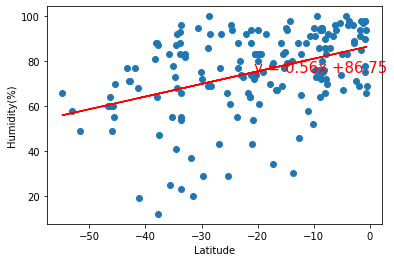

In [14]:
regression_plot(df_southern_hemisphere["Lat"],df_southern_hemisphere["Humidity"],"Latitude","Humidity(%)")

rsquare is low, indicating that the linear regression model may not be a good fit to the data.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.31x +41.82
The r-squared is: 0.16086302879238354


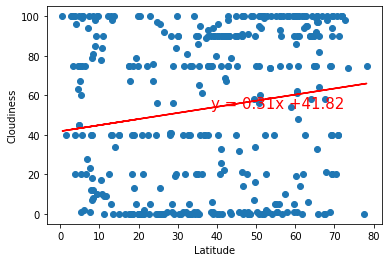

In [15]:
regression_plot(df_northern_hemisphere["Lat"],df_northern_hemisphere["Cloudiness"],"Latitude","Cloudiness")

rsquare is low, indicating that the linear regression model may not be a good fit to the data.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 1.01x +74.51
The r-squared is: 0.34691951558839607


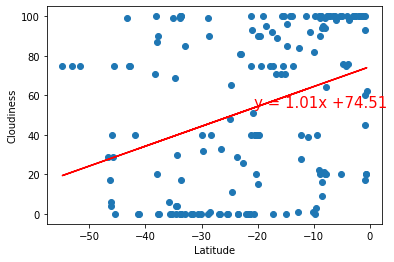

In [16]:
regression_plot(df_southern_hemisphere["Lat"],df_southern_hemisphere["Cloudiness"],"Latitude","Cloudiness")

rsquare is low, indicating that the linear regression model may not be a good fit to the data.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.02x +8.49
The r-squared is: 0.07401778907620883


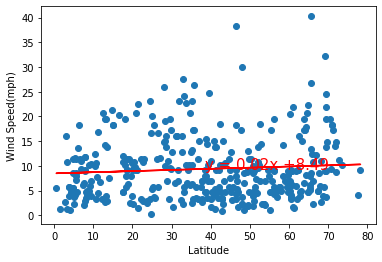

In [17]:
regression_plot(df_northern_hemisphere["Lat"],df_northern_hemisphere["Wind Speed"],"Latitude","Wind Speed(mph)")

rsquare is low, indicating that the linear regression model may not be a good fit to the data.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.19x +3.74
The r-squared is: -0.444673478073282


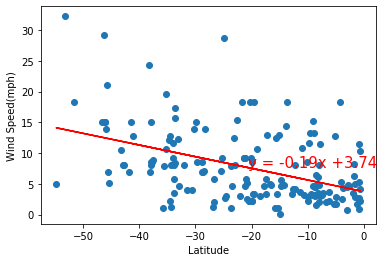

In [18]:
regression_plot(df_southern_hemisphere["Lat"],df_southern_hemisphere["Wind Speed"],"Latitude","Wind Speed(mph)")

rsquare is low, indicating that the linear regression model may not be a good fit to the data.